In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

In [3]:
import matplotlib as mpl

In [4]:
from IPython.display import Image

---

In [5]:
from sklearn.datasets import fetch_california_housing

In [6]:
prices = pd.read_csv('../data/MagnitPrices/Magnit.csv')
prices['date'] = pd.date_range('1/1/2016', periods=len(prices), freq='D')
share = pd.Series(prices.Magnit.ravel(), index=prices.date)

tips = sns.load_dataset('tips')
bunch = fetch_california_housing()
df, y = pd.DataFrame(data=bunch.data, columns=bunch.feature_names), bunch.target
df['target'] = y

# Изменения во времени

## Line plot

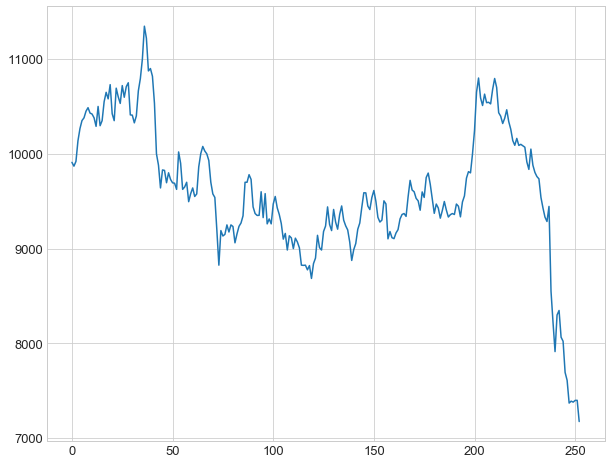

In [7]:
plt.plot(prices.Magnit);

__Когда использовать?__

Есть некоторый показатель, есть его колебания во времени.

## Bar plot

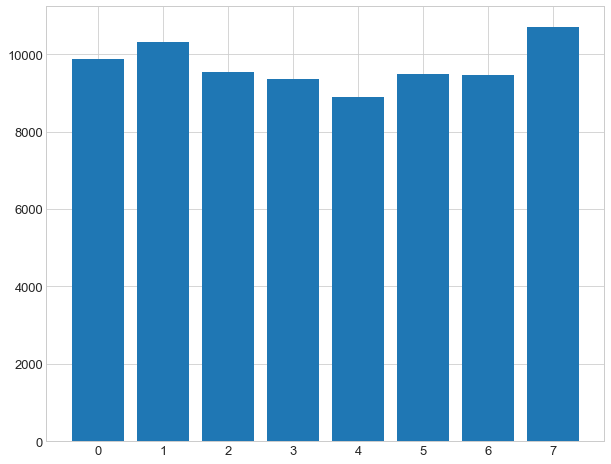

In [8]:
plt.bar(range(len(prices[1:220:30])), prices.Magnit[1:220:30]);

Аналогично line plot. Возможно, более актуален на коротком промежутке времени.

## Area plot

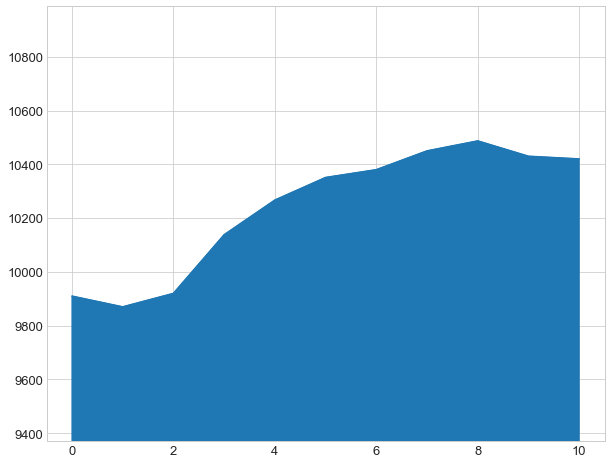

In [9]:
part = prices.Magnit[:11]
part.plot.area(ylim=[part.min() - 500, part.max() + 500]);

Хорошо показывает общий объем. Но частичные тенденции уловить сложно, так что надо аккуратно.

# Отклонения

## Bar plot

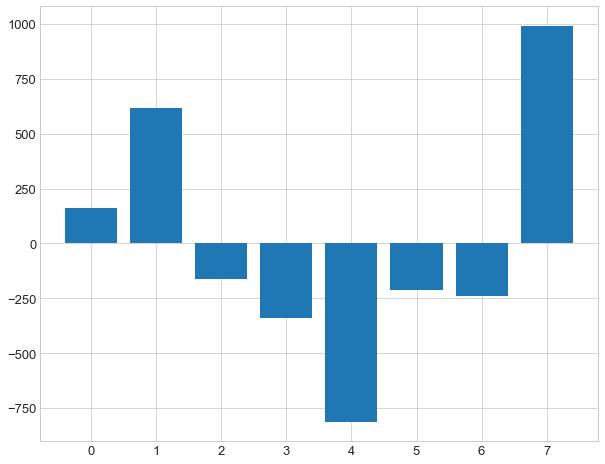

In [10]:
some_prices = prices.Magnit[1:220:30]
some_prices -= some_prices.mean()
plt.bar(range(len(some_prices)), some_prices);

## Spine chart

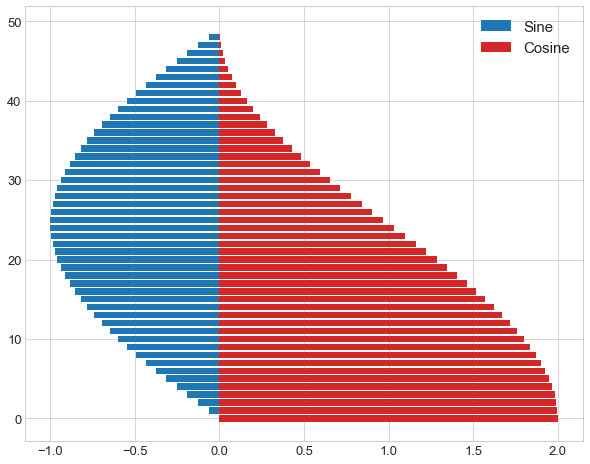

In [11]:
a = np.sin(np.linspace(0, np.pi))
b = np.cos(np.linspace(0, np.pi)) + 1
ind = range(len(a))

plt.barh(ind, -a, label='Sine');
plt.barh(ind, b, color='#d62728', label='Cosine');
plt.legend();

# Корреляция

## Scatterplot

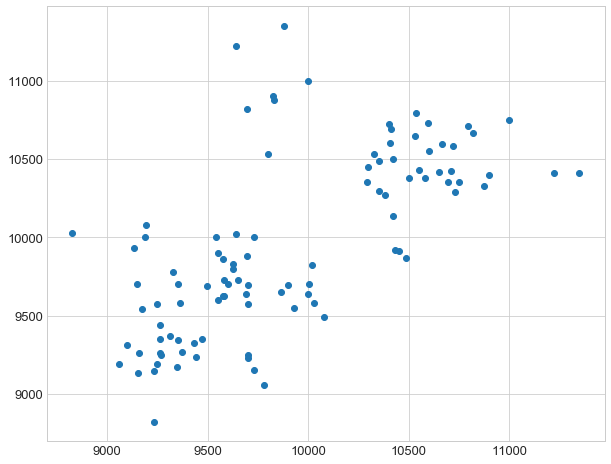

In [12]:
data = prices.Magnit[0:100]
data_lag = prices.Magnit[7:107]

plt.scatter(data_lag, data);

## Connected scatterplot 

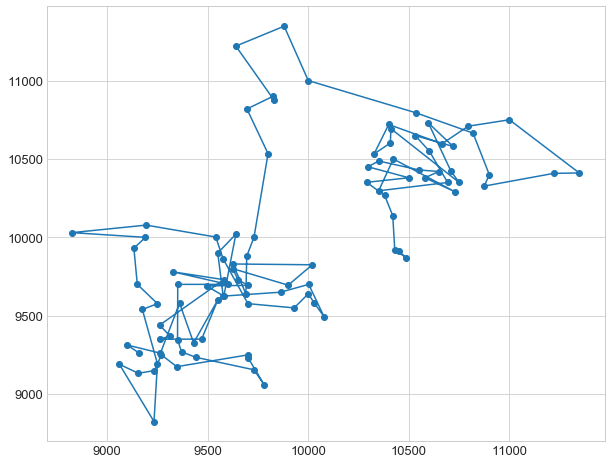

In [13]:
data = prices.Magnit[0:100]
data_lag = prices.Magnit[7:107]

plt.scatter(data_lag, data);
plt.plot(data_lag, data);

## Bubble plot

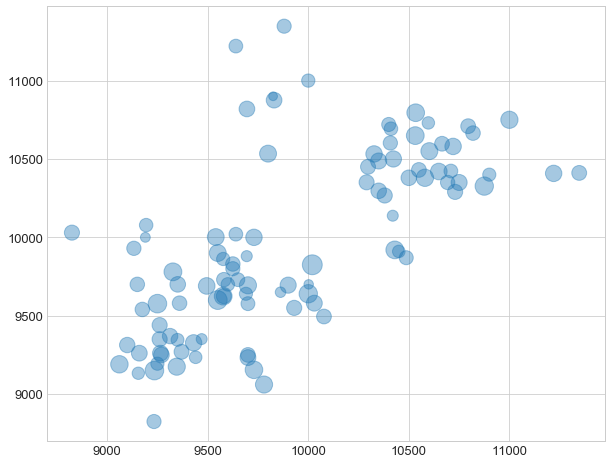

In [14]:
data = prices.Magnit[0:100]
data_lag = prices.Magnit[7:107]

sizes = np.random.randn(len(data))
sizes += np.abs(1.5*sizes.min())
sizes *= 70

plt.scatter(data_lag, data, s=sizes, alpha=0.4);

Like a scatterplot, but adds additional detail by sizing the circles according to a third variable

## Heatmap

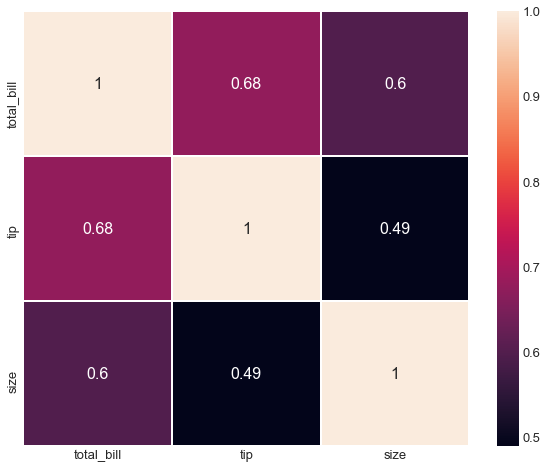

In [15]:
sns.heatmap(tips.corr(), annot=True, lw=1);

# Распределение

## Histogram

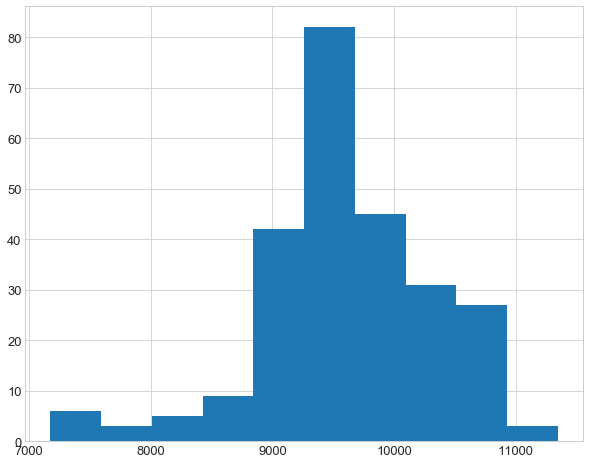

In [16]:
prices.Magnit.hist();

## Boxplot

https://en.wikipedia.org/wiki/Box_plot

<img src='../images/boxplot-explained.png'>

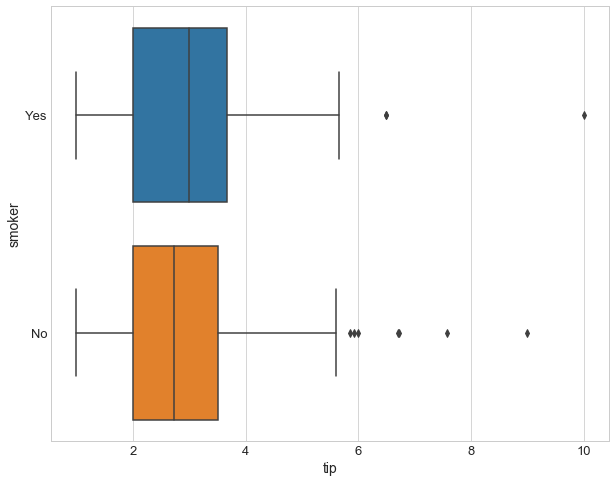

In [17]:
sns.boxplot(y='smoker', x='tip', orient='h', data=tips);

## Violin plot

https://en.wikipedia.org/wiki/Violin_plot

<img src='../images/violin-plot-01.png' width='400'><img src='../images/violin-plot-02.png' width='400'>

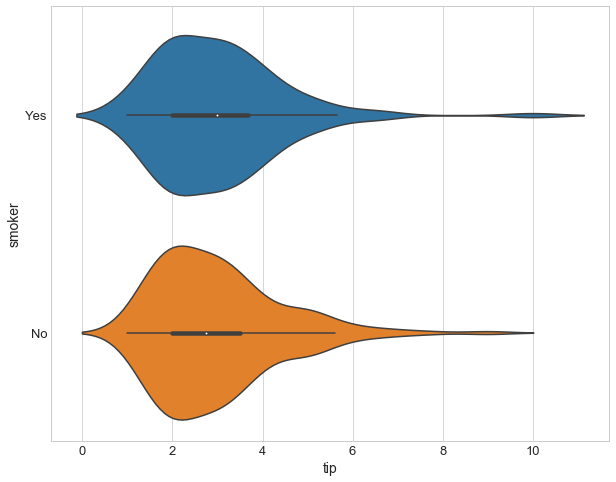

In [18]:
sns.violinplot(y='smoker', x='tip', orient='h', data=tips);

## Swarm plot

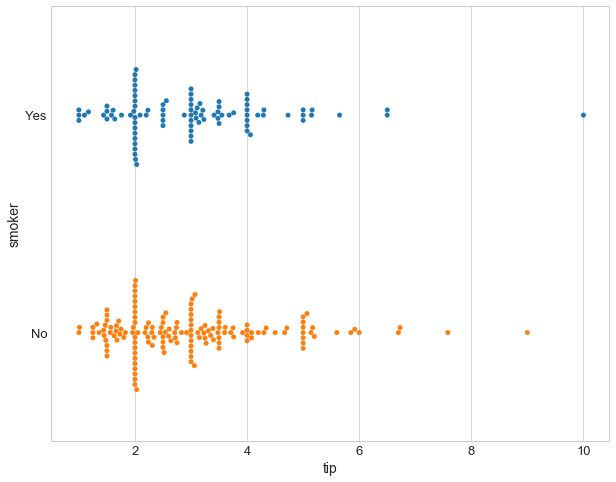

In [19]:
sns.swarmplot(y='smoker', x='tip', orient='h', data=tips);

## Stripplot

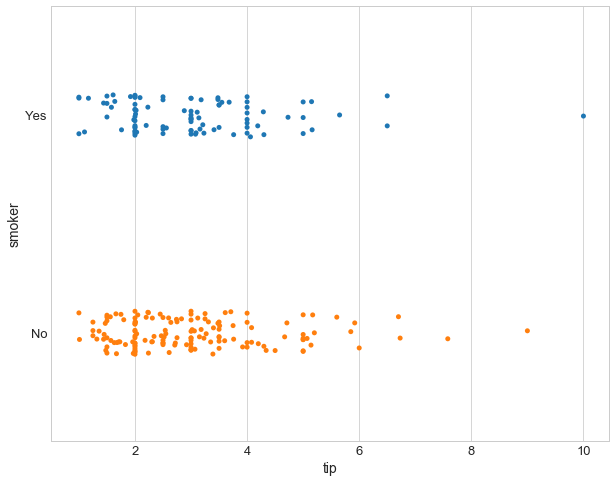

In [20]:
sns.stripplot(y='smoker', x='tip', orient='h', data=tips, jitter=True);

# Отношение "часть-целое"

## Stacked normalized (percentage) bar plot 

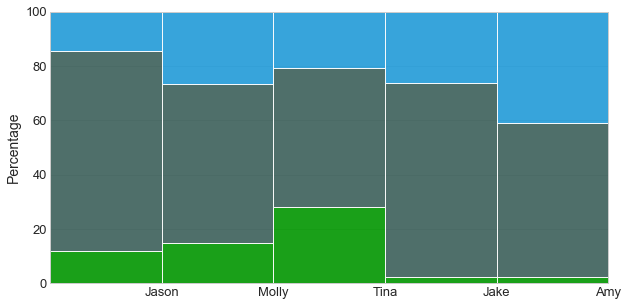

In [21]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'pre_score': [4, 24, 31, 2, 3],
        'mid_score': [25, 94, 57, 62, 70],
        'post_score': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'pre_score', 'mid_score', 'post_score'])

f, ax = plt.subplots(1, figsize=(10,5))

bar_width = 1

bar_l = [i for i in range(len(df['pre_score']))] 

tick_pos = [i+(bar_width/2) for i in bar_l] 

totals = [i+j+k for i,j,k in zip(df['pre_score'], df['mid_score'], df['post_score'])]
pre_rel = [i / j * 100 for  i,j in zip(df['pre_score'], totals)]
mid_rel = [i / j * 100 for  i,j in zip(df['mid_score'], totals)]
post_rel = [i / j * 100 for  i,j in zip(df['post_score'], totals)]

ax.bar(bar_l, pre_rel,                  label='Pre Score', alpha=0.9, color='#019600', width=bar_width, edgecolor='white')
ax.bar(bar_l, mid_rel,  bottom=pre_rel, label='Mid Score', alpha=0.9, color='#3C5F5A', width=bar_width, edgecolor='white')
ax.bar(bar_l, post_rel, bottom=[i+j for i,j in zip(pre_rel, mid_rel)], label='Post Score',alpha=0.9, 
       color='#219AD8', width=bar_width,edgecolor='white')

plt.xticks(tick_pos, df['first_name'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")
ax.margins(0);

plt.show()

## Pie chart

In [22]:
tips.day = tips.day.astype('category')

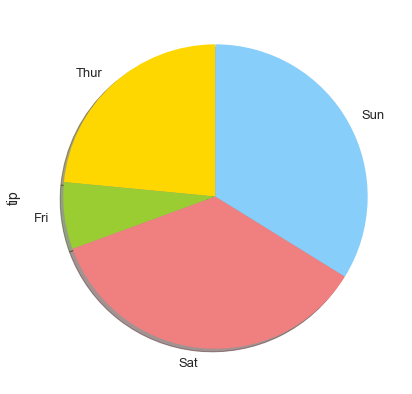

In [23]:
f, ax = plt.subplots(1, figsize=(7,7))
tips.groupby('day').agg('sum')['tip'].plot.pie(ax=ax, shadow=True, startangle=90, 
                                               colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']);

# Геоданные

In [24]:
bunch = fetch_california_housing()
df, y = pd.DataFrame(data=bunch.data, columns=bunch.feature_names), bunch.target
df['target'] = y

```
!pip install folium

```

In [27]:
from folium import Map, CircleMarker
import colorsys

In [28]:
california_map = Map(location=(37.88, -122.23), 
#                      tiles='Mapbox Bright',
                     zoom_start=6)

In [29]:
get_radius = lambda x: (x - min_)/(max_ - min_)*7 + 3

rgbhex = lambda rgb: '#'+"".join("%02X" % i for i in rgb)
get_fill_color = lambda x: rgbhex(tuple(int(i * 255) for i in \
                                   colorsys.hsv_to_rgb(x/max_*120.0/360.0, 0.56, 0.84)))
get_border_color = lambda x: rgbhex(tuple(int(i * 255) for i in \
                                   colorsys.hsv_to_rgb(x/max_*120.0/360.0, 0.78, 0.36)))

add_marker = lambda lat, lon, target: \
    CircleMarker((lat, lon), 
                 radius     = get_radius(target), 
                 color      = get_border_color(target),
                 fill_color = get_fill_color(target), 
                 popup='Lat: %.3f; Lon: %.3f' % (lat, lon),
                    )\
    .add_to(california_map)

In [30]:
min_, max_ = df[['target']].describe().loc['min'][0], df[['target']].describe().loc['max'][0]

In [31]:
df.sample(n=500).apply(lambda row: add_marker(row['Latitude'], row['Longitude'], row['target']), axis=1);

In [40]:
# california_map

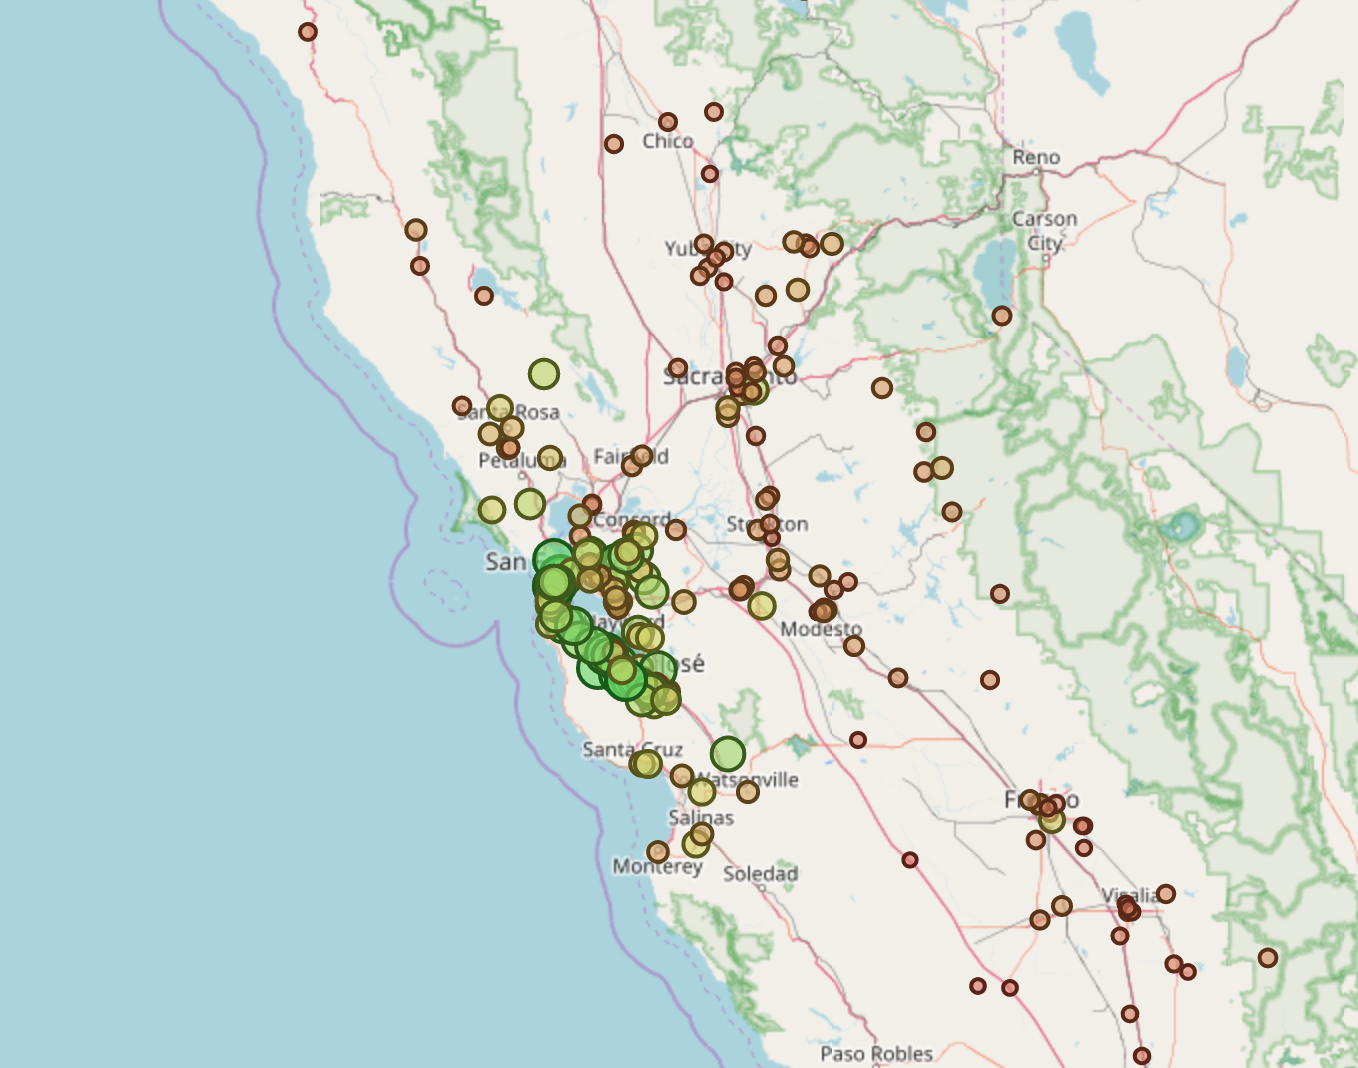

In [37]:
Image(filename='../images/map.png')

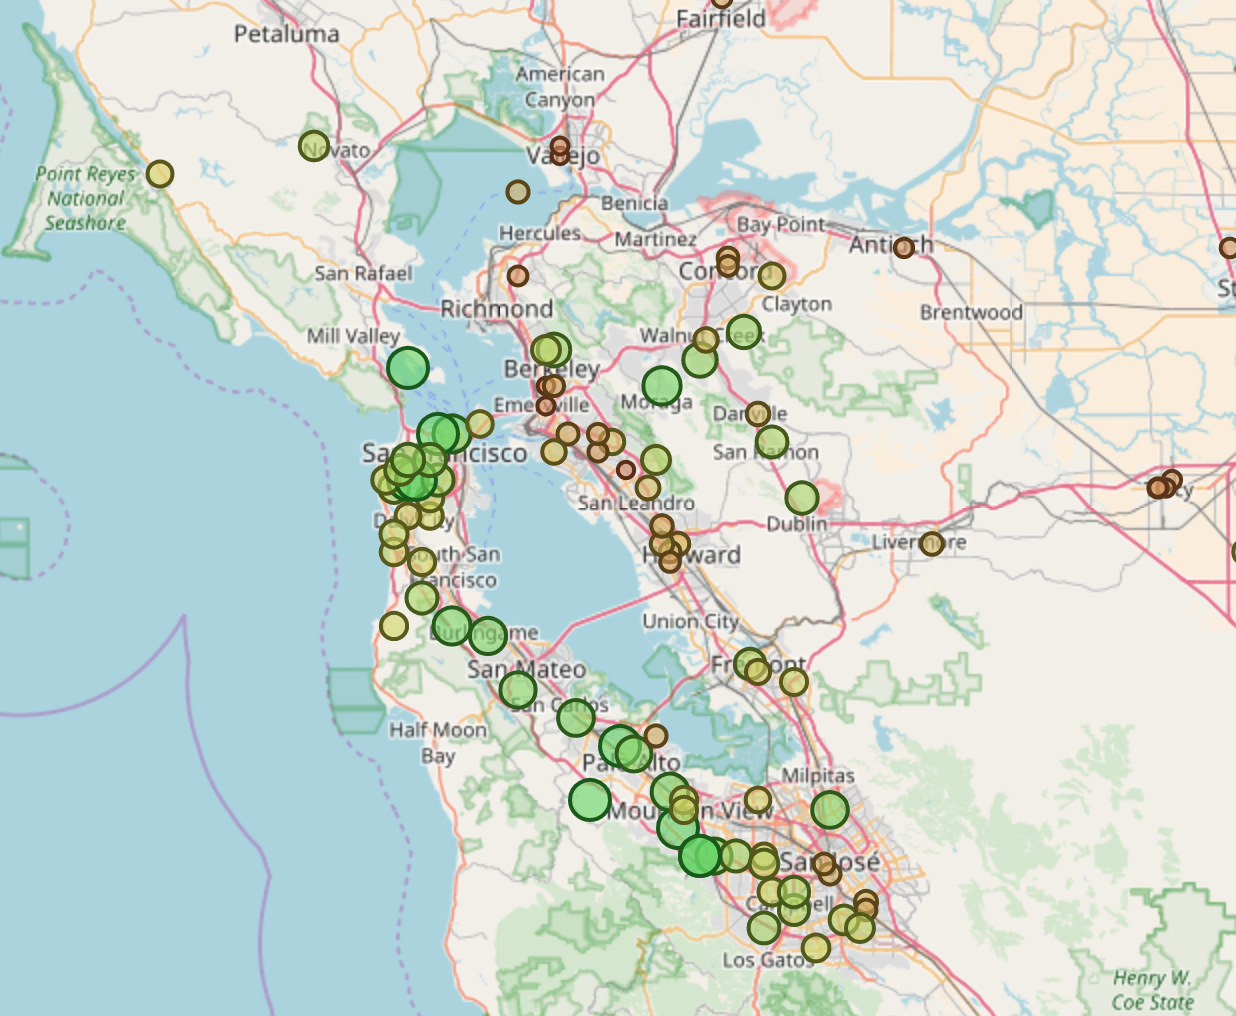

In [38]:
Image(filename='../images/mapClose.png')

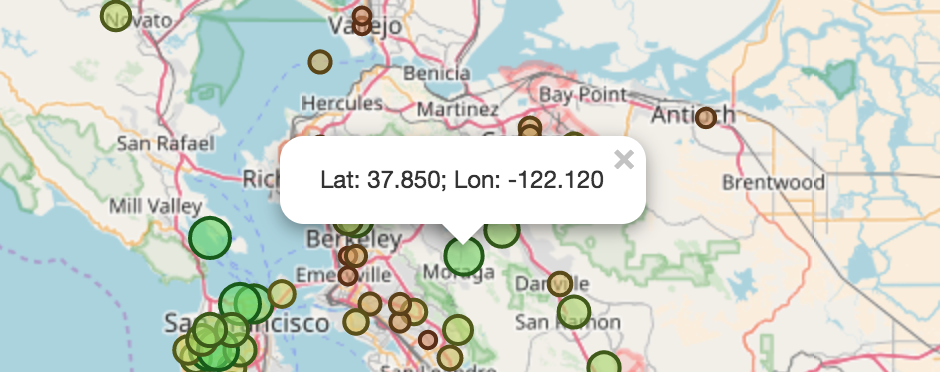

In [39]:
Image('../images/mapBubble.png')

# Ссыкли

- https://ft-interactive.github.io/visual-vocabulary/
- https://python-graph-gallery.com/
- https://datavizcatalogue.com/RU/index.html